# `scipy.interpolate`

Let's try out some robust interpolation schemes available in the [interpolation module of the scipy package](https://docs.scipy.org/doc/scipy/reference/interpolate.html). Let's use the data used in the previous classes for this exercise.

In [1]:
import numpy as np

#=== Read the data from a file
myfile=open('data/fit_01.csv','r')

x_data=np.array([])
y_data=np.array([])

iline=0
for line in myfile:
    if iline > 0:            # i == 0 corresponds to the heading
        string=line.split(',')  # csv, comma separated values
        valx=eval(string[0])
        valy=eval(string[1])
        x_data=np.append(x_data,[valx])
        y_data=np.append(y_data,[valy])
        
    iline=iline+1
myfile.close() 

## `scipy.interpolate.interp1d` 

Let's try the simplest function, `interp1d`. The default interpolation scheme used in this function is linear interpolation.

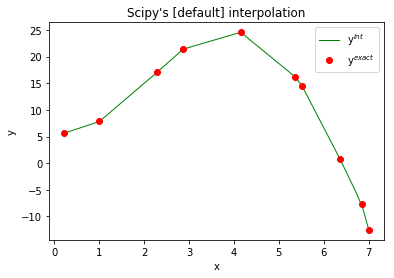

In [3]:
from scipy import interpolate
import matplotlib.pyplot as plt

f=interpolate.interp1d(x_data, y_data)

x_min=np.min(x_data)
x_max=np.max(x_data)
N_grids=51

xgrids=np.linspace(x_min, x_max, N_grids)
ygrids_1=f(xgrids)

plt.plot(xgrids,ygrids_1,'-',color='g',linewidth=1,label='y$^{int}$')
plt.plot(x_data,y_data,'o',color='r',linewidth=1,label='y$^{exact}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Scipy\'s [default] interpolation')

plt.show()

The function `interp1d` has options to use better schemes. For more details see [https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

Let's try the cubic interpolation scheme.

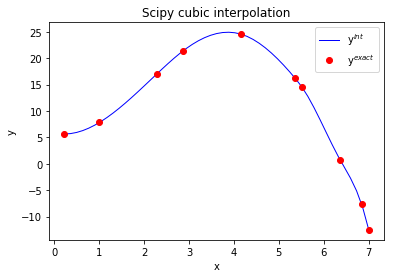

In [4]:
f=interpolate.interp1d(x_data, y_data, 'cubic')

ygrids_2=f(xgrids)

plt.plot(xgrids,ygrids_2,'-',color='b',linewidth=1,label='y$^{int}$')
plt.plot(x_data,y_data,'o',color='r',linewidth=1,label='y$^{exact}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Scipy cubic interpolation')

plt.show()

The cubic scheme is a very robust scheme. The resulting function is smooth (continuous) and reasonably stiff (does not oscillate between data points).

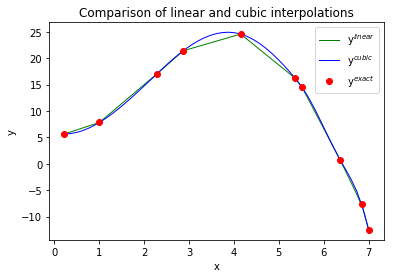

In [5]:
plt.plot(xgrids,ygrids_1,'-',color='g',linewidth=1,label='y$^{linear}$')
plt.plot(xgrids,ygrids_2,'-',color='b',linewidth=1,label='y$^{cubic}$')
plt.plot(x_data,y_data,'o',color='r',linewidth=1,label='y$^{exact}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Comparison of linear and cubic interpolations')

plt.show()